In [ ]:
# Check if GPU is available 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

### Import local module

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as image
from src.model.loss import earth_movers_distance
from src.utils.ava_preprocess import get_rating_columns, get_ava_csv_df
from src.utils.image_utils import get_reshaped_image
from src.model.model_builder import NIMA

In [ ]:
# import tensorflow as tf
# import tensorflow.keras as keras
import keras as keras
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Dense, Dropout

#### Read the file

In [2]:
import modin.pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = get_ava_csv_df()
rating_columns = get_rating_columns()
df.head()

,index,image_id,count_rating_1,count_rating_2,count_rating_3,count_rating_4,count_rating_5,count_rating_6,count_rating_7,count_rating_8,count_rating_9,count_rating_10,tag_1,tag_2,challange_id
0,1,953619,0,1,5,17,38,36,15,6,5,1,1,22,1396
1,2,953958,10,7,15,26,26,21,10,8,1,2,1,21,1396
2,3,954184,0,0,4,8,41,56,10,3,4,0,0,0,1396
3,4,954113,0,1,4,6,48,37,23,5,2,2,15,21,1396
4,5,953980,0,3,6,15,57,39,6,1,1,1,22,38,1396


In [ ]:
df.shape

### Sample Mobilenet model

In [72]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

target_shape = (224, 224)
model = VGG16()

print(model.layers)
model.layers[-3].output

# image_path = os.path.join(os.path.join("../data/AVA/images"), "124.jpg")
# plt.imshow(image.imread(image_path))
# img = load_img( image_path, target_size=(target_shape[0], target_shape[1]) )  # load image from file
# img = img_to_array(img)  # convert pixes to numpy array
# img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
# print(img.shape)
# img = preprocess_input(img)

# # Predict the image
# y_hat = model.predict(img)
# label = decode_predictions(y_hat)
# print(label)
# label = label[0][0]

# print(f"{label[1]} {label[2]*100:.2f}%")

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f163c6e61f0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15f61c0700>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15f637d970>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f15f553ff10>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15f6118970>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15f5b91a30>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f15f5b81af0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15f6118220>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15f6047970>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15f63b3d90>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f15f600de50>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15f6118640>, <tensorflow.python.keras.layers.convo

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'fc1')>

In [ ]:
base_model = VGG16(
    input_shape=(224, 224, 3),  # Shape of our images
    include_top=False,  # Leave out the last fully connected layer
    weights="imagenet",
    pooling="avg",
)
for layer in base_model.layers:
    layer.trainable = False

x = Dropout(0.75)(base_model)
x = Dense(10, activation="softmax")(x)

#### Compile network 

In [ ]:
base_model
base_model.compile(optimizeR=adam(), loss="categorical crossentropy")

tensorflow.keras.applications.mobilenet_v2.MobileNetV2
(1, 224, 224, 3)


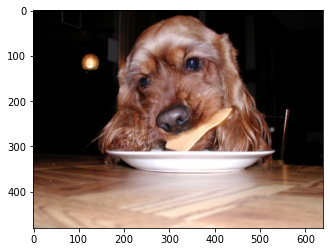

In [3]:
model = NIMA(base_model_name='mobilenet', loss='categorical_crossentropy')
model.build()

# Form the Image 
target_shape = (224, 224)
image_path = os.path.join(os.path.join("./data/AVA/images"), "124.jpg")
plt.imshow(image.imread(image_path))

img = get_reshaped_image(image_path, target_shape)
print(img.shape)
# img = model.preprocess_input(img)

# Predict the image
# y_hat = model.predict(img)
# print(y_hat)

# label = model.decode_predictions(y_hat)
# print(label)
# label = label[0][0]

# print(f'{label[1]} {label[2]*100:.2f}%')

14540800/14536120 [==============================] - 3s 0us/step
(1, 224, 224, 3)
[[('n02102318', 'cocker_spaniel', 0.5200459), ('n02100877', 'Irish_setter', 0.25320828), ('n02093991', 'Irish_terrier', 0.046631463), ('n02096294', 'Australian_terrier', 0.020312075), ('n02102480', 'Sussex_spaniel', 0.018049322)]]
cocker_spaniel 52.00%


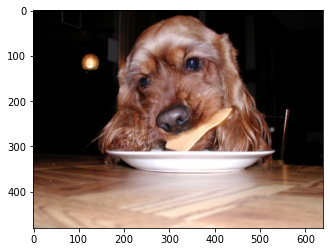

In [61]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions


target_shape = (224, 224)
model = MobileNetV2()

image_path = os.path.join(os.path.join("../data/AVA/images"), "124.jpg")
plt.imshow(image.imread(image_path))
img = load_img( image_path, target_size=(target_shape[0], target_shape[1]) )  # load image from file
img = img_to_array(img)  # convert pixes to numpy array
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
print(img.shape)
img = preprocess_input(img)

# Predict the image
y_hat = model.predict(img)
label = decode_predictions(y_hat)
print(label)
label = label[0][0]

print(f"{label[1]} {label[2]*100:.2f}%")

In [73]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.efficientnet import decode_predictions


target_shape = (224, 224)
model = MobileNetV2()

# image_path = os.path.join(os.path.join("../data/AVA/images"), "124.jpg")
# plt.imshow(image.imread(image_path))
# img = load_img( image_path, target_size=(target_shape[0], target_shape[1]) )  # load image from file
# img = img_to_array(img)  # convert pixes to numpy array
# img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
# print(img.shape)
# img = preprocess_input(img)

# # Predict the image
# y_hat = model.predict(img)
# label = decode_predictions(y_hat)
# print(label)
# label = label[0][0]

# print(f"{label[1]} {label[2]*100:.2f}%")

model.layers

In [68]:
model.layers[-1].output

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [ ]:
import tensorflow.keras.applications.NASNetMobile
